In [1]:
import torch
import numpy as np

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [2]:
import hsup as _
import gymnasium as gym

import dataset.preprocess as preprocess
import dataset.simulation as simulation
import dataset.data as data


In [3]:

max_eposide_steps = 24 * 7
discretize = False


In [4]:

model_sec_back_t = simulation.MLPModel.load_from_checkpoint("lightning_logs/split.sec_back_t/checkpoints/epoch=816-step=90687.ckpt")
model_indoor = simulation.MLPModel.load_from_checkpoint("lightning_logs/split.indoor/checkpoints/epoch=814-step=90465.ckpt")

model_sec_back_t.eval()
model_indoor.eval()

env = gym.make(
    "hsup/HeatSupply",
    max_episode_steps=max_eposide_steps,
    data=data.train_data,
    model_sec_back_t=model_sec_back_t,    
    model_indoor=model_indoor,
    discretize=discretize,
)


In [5]:
import stable_baselines3
import torch
from stable_baselines3 import DQN, PPO, SAC

policy = stable_baselines3.dqn

model = SAC("MlpPolicy", env, verbose=1, tensorboard_log="./runs", seed=0)
total_timesteps = int(1e4)
log_interval = 1

model_class = model.__class__.__name__

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


AssertionError: The algorithm only supports (<class 'gymnasium.spaces.box.Box'>,) as action spaces but Discrete(21, start=-10) was provided

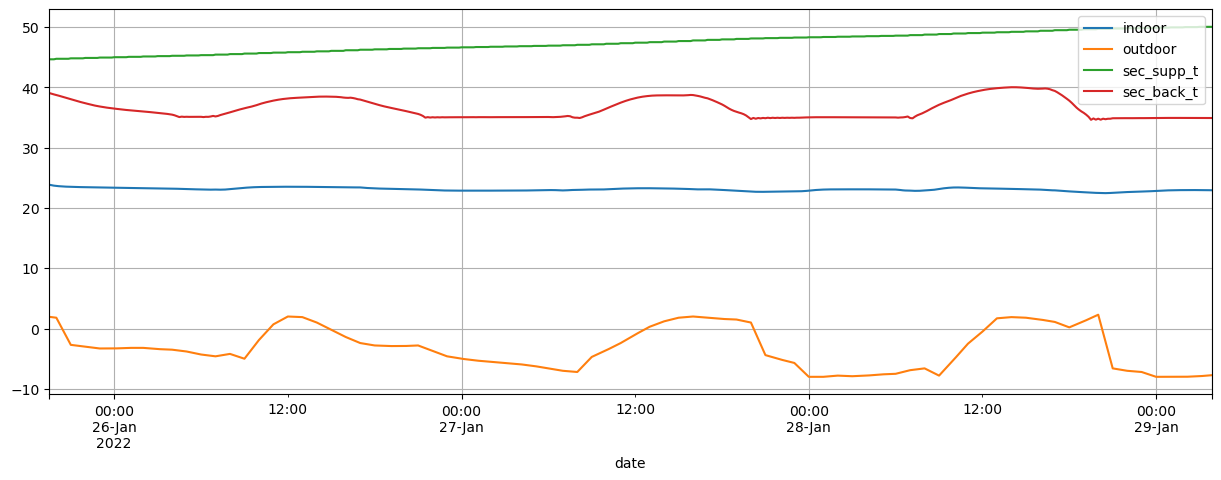

In [ ]:
model = model.load(f"checkpoints/{model_class}-{total_timesteps}")

env = gym.make(
    "hsup/HeatSupply",
    # max_episode_steps=24 * 6,
    data=data.train_data,
    model_sec_back_t=model_sec_back_t,    
    model_indoor=model_indoor,
    discretize=discretize,
)

obs, _ = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, trunc, _ = env.step(action)
    if trunc or done:
        break
    
env.plot()